# 7장 머신러닝 알고리즘과 모델

## 7.6 의사결정트리(Decision tree)

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

# 자료 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델 선택
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 성능지표
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report

# 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline

# 시각화 툴
import scikitplot as skplt

# 모델저장
from joblib import dump, load

In [2]:
def pq(p):
   return p*(1 - p)

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def cross_entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def miss_clear(p):
   return 1 - np.max([p, 1 - p])

<Figure size 864x504 with 0 Axes>

(0.0, 1.1)

Text(0.5, 0, 'p(i=1)')

Text(0, 0.5, '정보불순도')

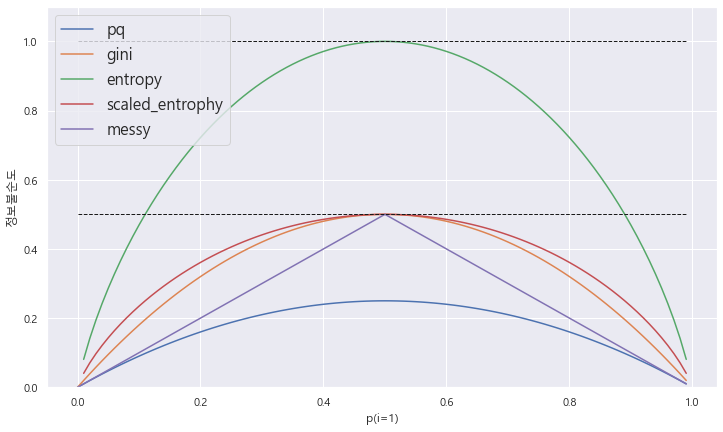

In [3]:
plt.figure(figsize=(12, 7)); plt.rc('legend', fontsize=16)
x = np.arange(0.0, 1.0, 0.01)
plt.plot(x, pq(x), label='pq'); plt.legend()
plt.plot(x, gini(x), label='gini'); plt.legend() # pq*2(이진분류)
plt.plot(x, [cross_entropy(p) if p != 0 else None for p in x],  label='entropy')
plt.legend()
plt.plot(x, cross_entropy(x)*0.5, label='scaled_entrophy'); plt.legend()
plt.plot(x, [miss_clear(i) for i in x], label='messy'); plt.legend()
plt.plot(x, [0.5]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.plot(x, [1.0]*x.shape[0], linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1]); plt.xlabel('p(i=1)'); plt.ylabel('정보불순도')

In [4]:
X = pd.read_pickle('../data/X.pkl') # 특성변수만 반영
y = pd.read_pickle('../data/y.pkl')
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=11)

In [5]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier(random_state=11)

<Figure size 1800x432 with 0 Axes>

Text(0, 0.5, 'Features Importance')

Text(0.5, 1.0, '의사결정트리의 변수 중요도')

([<matplotlib.axis.XTick at 0x1c3b8ba3460>,
 [Text(0, 0, 'tv9'),
  Text(0, 0, 'drama3'),
  Text(0, 0, '지역_부산울산경남'),
  Text(0, 0, '지역_경기인천'),
  Text(0, 0, 'tv4'),
  Text(0, 0, 'drama4'),
  Text(0, 0, '직업_무직기타'),
  Text(0, 0, '지역_대구경북'),
  Text(0, 0, 'tv15'),
  Text(0, 0, 'tv8'),
  Text(0, 0, 'drama15'),
  Text(0, 0, '연령'),
  Text(0, 0, '인터넷평일'),
  Text(0, 0, '인터넷주말'),
  Text(0, 0, 'tv10'),
  Text(0, 0, '모바일평일'),
  Text(0, 0, 'tv3'),
  Text(0, 0, 'tv2'),
  Text(0, 0, '성별_여자'),
  Text(0, 0, '모바일주말'),
  Text(0, 0, '주거형태'),
  Text(0, 0, '직업_기능노무직'),
  Text(0, 0, 'drama9'),
  Text(0, 0, 'drama8'),
  Text(0, 0, '직업_학생재수생'),
  Text(0, 0, 'tv7')])

<BarContainer object of 26 artists>

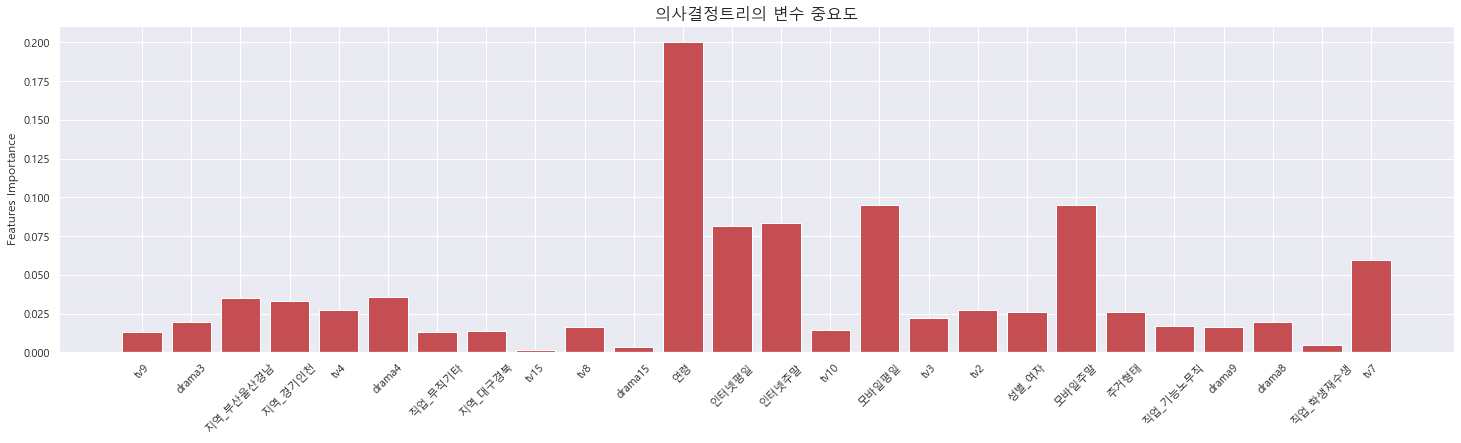

In [6]:
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X, y)
plt.figure(figsize=(25,6)); plt.ylabel('Features Importance')
plt.title('의사결정트리의 변수 중요도', fontsize=16)
plt.xticks(np.arange(X.shape[1]), X.columns, rotation='45')
plt.bar(range(X.shape[1]), dt.feature_importances_, color='r')

In [7]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 11,
 'splitter': 'best'}

In [8]:
params = {
    'criterion' :['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth' : np.arange(1,10),
    'min_samples_split': [0.005, 0.01, 0.05, 0.10],
    'min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [9]:
np.random.seed(1111)
kf = KFold(n_splits=5)
model = DecisionTreeClassifier(random_state=11)
grid = RandomizedSearchCV(model, params, cv=kf, n_iter=500, 
                          scoring = 'recall_macro', verbose =True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:   15.0s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=11),
                   n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [0.005, 0.01, 0.05,
                                                             0.1],
                                        'min_samples_split': [0.005, 0.01, 0.05,
                                                              0.1],
                                        'splitter': ['best', 'random']},
                   scoring='recall_macro', verbose=True)

In [10]:
print('optimal parameter: {}'.format(grid.best_params_))

optimal parameter: {'splitter': 'best', 'min_samples_split': 0.1, 'min_samples_leaf': 0.005, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}


In [11]:
best_params = grid.best_params_
tuned_params = {item[:]: best_params[item] for item in best_params}
model= DecisionTreeClassifier(random_state=11).set_params(**tuned_params)

In [12]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.1,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 11,
 'splitter': 'best'}

In [13]:
model.fit(X_train, y_train)
print("Feature importances:\n{}".format(model.feature_importances_))

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       min_samples_leaf=0.005, min_samples_split=0.1,
                       random_state=11)

Feature importances:
[0.         0.0939098  0.3993219  0.         0.02767854 0.14010578
 0.         0.16477041 0.         0.         0.         0.03028625
 0.         0.         0.         0.         0.         0.
 0.12284699 0.02108033 0.         0.         0.         0.
 0.         0.        ]


In [14]:
from joblib import dump, load
dump(model, '../output/dt.joblib')

['../output/dt.joblib']

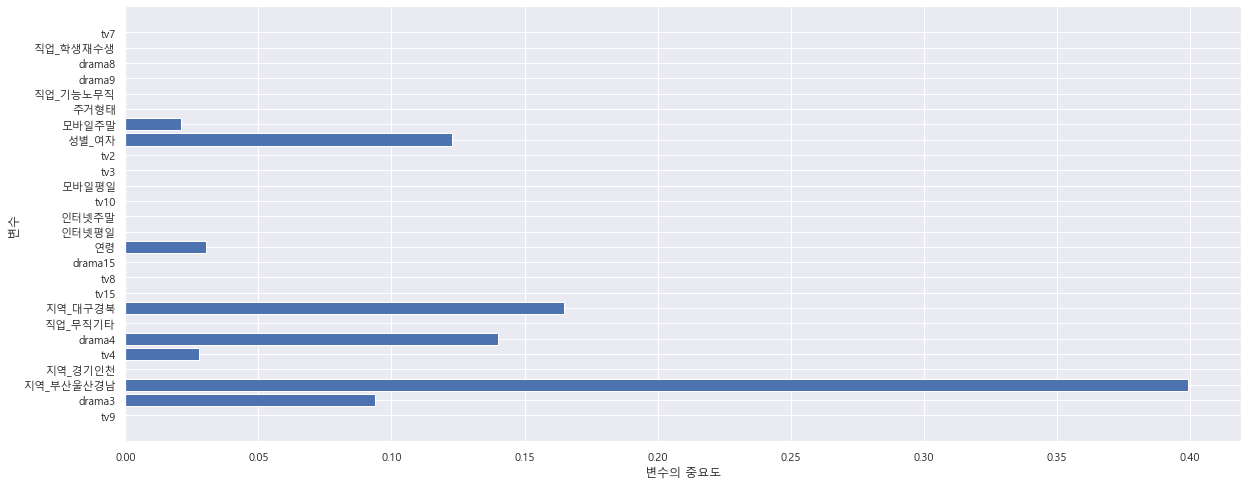

In [15]:
def plot_feature_importances(model):
    fig, ax = plt.subplots(1,1,figsize=(20,8))
    plt.barh(range(X_train.shape[1]), model.feature_importances_, align='center')
    plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
    plt.xlabel('변수의 중요도')
    plt.ylabel('변수')
    plt.savefig('../output/Feature_importance') 
    
plot_feature_importances(model)

In [16]:
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.84      0.75       522
           1       0.47      0.27      0.34       278

    accuracy                           0.64       800
   macro avg       0.58      0.55      0.55       800
weighted avg       0.61      0.64      0.61       800



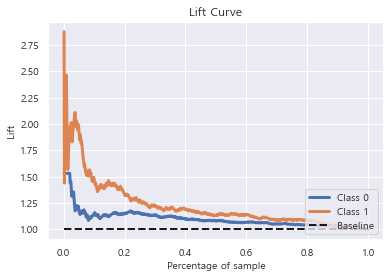

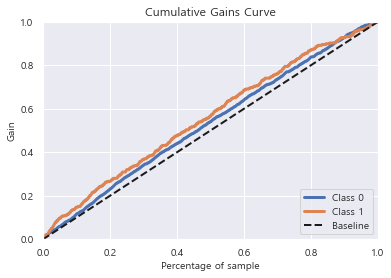

In [17]:
y_proba = model.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_proba)
skplt.metrics.plot_cumulative_gain(y_test, y_proba)

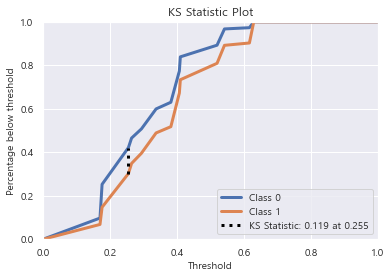

In [18]:
skplt.metrics.plot_ks_statistic(y_test, y_proba)

In [19]:
from scipy.stats import ks_2samp
ks_2samp(y_test, y_predict)

KstestResult(statistic=0.15, pvalue=2.8779743500961928e-08)

## 7.7 앙상블(Ensemble)

In [20]:
dt = load('../output/dt.joblib')

In [21]:
from sklearn.ensemble import BaggingClassifier
np.random.seed(1357) 
dt = DecisionTreeClassifier(random_state=11)
bag = BaggingClassifier(dt, n_estimators = 30, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)

0.67875

In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78       522
           1       0.56      0.35      0.43       278

    accuracy                           0.68       800
   macro avg       0.64      0.60      0.60       800
weighted avg       0.66      0.68      0.66       800



<Figure size 1080x432 with 0 Axes>

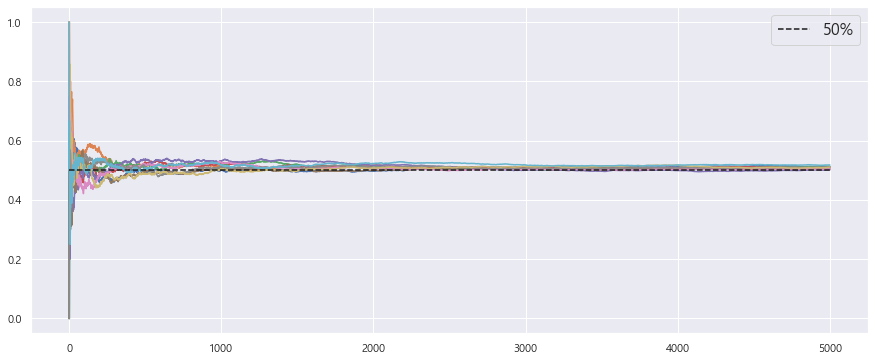

In [23]:
jurors_proba = 0.51
num_jurors = 10; num_trals = 5000 
num_decisions=(np.random.rand(num_trals, num_jurors)<jurors_proba)*1
total_trials = np.arange(1, num_trals+1).reshape(-1, 1)
cum_right_ratio=np.cumsum(num_decisions, axis=0)/total_trials
plt.figure(figsize=(15,6)); plt.plot(cum_right_ratio)
plt.plot([0, num_trals], [0.5, 0.5], 'k--', label='50%')
plt.legend(loc='higher right')

In [24]:
from sklearn.tree import DecisionTreeClassifier
stump= DecisionTreeClassifier(max_depth=1, random_state=1357)

In [25]:
bag = BaggingClassifier(stump, n_estimators = 500, max_samples =0.8)
y_predict = bag.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.6475

              precision    recall  f1-score   support

           0       0.67      0.89      0.77       522
           1       0.48      0.19      0.28       278

    accuracy                           0.65       800
   macro avg       0.58      0.54      0.52       800
weighted avg       0.61      0.65      0.60       800



In [26]:
BaggingClassifier().get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 20, 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [29]:
np.random.seed(4321)
rf = RandomForestClassifier(random_state=11)
rf_random = RandomizedSearchCV(rf, random_grid, cv=kf, scoring = 'recall_macro')
y_predict = rf_random.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)

0.68875

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       522
           1       0.62      0.27      0.37       278

    accuracy                           0.69       800
   macro avg       0.66      0.59      0.58       800
weighted avg       0.67      0.69      0.65       800



In [31]:
from sklearn.metrics import roc_auc_score, average_precision_score
y_proba = rf_random.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:, 1])
average_precision_score(y_test, y_proba[:, 1])

0.6558580721629593

0.5413653940621281

In [32]:
n = 10000
trials = 10000
print(f'1 회 비복원추출시 뽑힐 확률은 {1/n}')
print(f'1 회 비복원추출시 안 뽑힐 확률은 {(1-1/n)}')
print(f'{trials}번 비복원 추출시 계속 안 뽑힐 확률은 {(1-1/n)**trials}')

1 회 비복원추출시 뽑힐 확률은 0.0001
1 회 비복원추출시 안 뽑힐 확률은 0.9999
10000번 비복원 추출시 계속 안 뽑힐 확률은 0.36786104643297046


In [33]:
rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=1357)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Mean accuracy score: {accuracy:.3}')
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=1357)

Mean accuracy score: 0.684
Out-of-bag score estimate: 0.691


In [34]:
min_estimators = 1; max_estimators = 100
clf = RandomForestClassifier(warm_start=True, oob_score=True,
                             max_features='sqrt', random_state=11)

In [35]:
oob_error_list =[]
for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)
    oob_error = 1 - clf.oob_score_
    oob_error_list.append(oob_error)

RandomForestClassifier(max_features='sqrt', n_estimators=1, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=1, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=2, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=2, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=3, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=3, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=4, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=4, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=5, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=5, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=6, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=6, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=7, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=7, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=8, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=8, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=9, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=9, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=10, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=10, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=11, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=11, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=12, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=12, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=13, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=13, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=14, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=14, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=15, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=15, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=16, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=16, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=17, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=17, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=18, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=18, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=19, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=19, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=20, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=20, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=21, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=21, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=22, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=22, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=23, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=23, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=24, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=24, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=25, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=25, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=26, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=26, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=27, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=27, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=28, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=28, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=29, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=29, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=30, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=30, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=31, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=31, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=32, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=33, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=33, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=34, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=34, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=35, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=35, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=36, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=36, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=37, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=37, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=38, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=38, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=39, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=39, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=40, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=40, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=42, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=42, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=43, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=43, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=44, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=44, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=45, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=45, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=46, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=46, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=47, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=47, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=48, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=48, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=49, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=49, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=50, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=50, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=51, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=51, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=52, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=52, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=53, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=53, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=54, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=54, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=55, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=55, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=56, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=56, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=57, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=57, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=58, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=58, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=59, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=59, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=60, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=60, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=61, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=61, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=62, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=62, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=63, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=63, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=64, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=64, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=65, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=65, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=66, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=66, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=67, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=67, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=68, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=68, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=69, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=69, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=70, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=70, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=71, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=71, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=72, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=72, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=73, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=73, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=74, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=74, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=75, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=75, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=76, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=76, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=77, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=77, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=78, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=78, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=79, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=79, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=80, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=80, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=81, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=81, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=82, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=82, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=83, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=83, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=84, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=84, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=85, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=85, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=86, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=86, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=87, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=87, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=88, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=88, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=89, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=89, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=90, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=90, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=91, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=91, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=92, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=92, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=93, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=93, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=94, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=94, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=95, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=95, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=96, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=96, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=97, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=97, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=98, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=98, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=99, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', n_estimators=99, oob_score=True,
                       random_state=11, warm_start=True)

RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=11,
                       warm_start=True)

RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=11,
                       warm_start=True)

(1.0, 100.0)

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'OOB error rate')

Text(0.5, 1.0, 'Randomforest with max_features= sqrt')

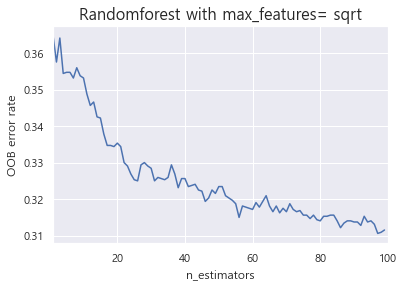

In [36]:
plt.plot(oob_error_list)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators"); plt.ylabel("OOB error rate")
plt.title('Randomforest with max_features= sqrt', fontsize=16)

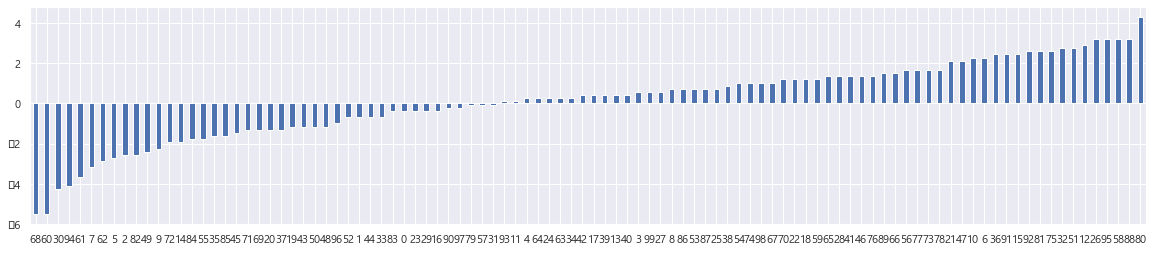

In [37]:
sur_diff = []
for i in range(100) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                        random_state = i) 
    diff01 = y_train.value_counts(normalize = True)[1]
    diff02 = y_test.value_counts(normalize = True)[1]
    sur_diff.append(round((diff01-diff02)*100,2))
pd.Series(sur_diff).sort_values().plot(kind='bar', rot='360', figsize=(20,4))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,
                                                   random_state =11)

In [39]:
acc_list = []
for i in np.random.choice(250000, 50, replace=False) :
    clf = RandomForestClassifier(n_estimators = 50, random_state = i) 
    clf = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)  
    acc = round(accuracy_score(y_true = y_test, y_pred = preds), 3)
    acc_list.append(acc)

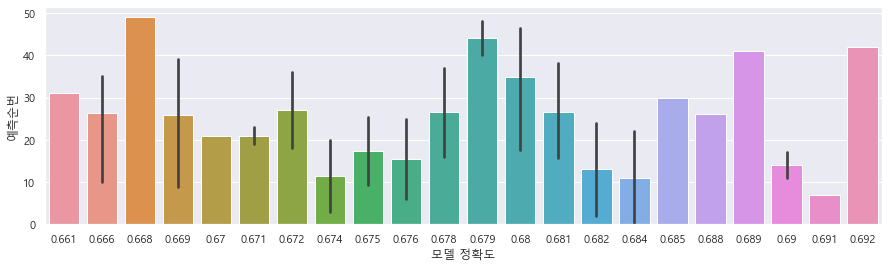

In [40]:
data = (pd.Series(acc_list).reset_index().
        rename(columns={'index': '예측순번', 0: '모델 정확도'}))
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
ax = sns.barplot(x='모델 정확도', y='예측순번', data=data)

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [42]:
estimators=[('lgr', LogisticRegression(class_weight='balanced')),
            ('rf',  RandomForestClassifier(class_weight='balanced')),
            ('gnb', GaussianNB())]
eclf = VotingClassifier(estimators, voting='soft')

In [43]:
params = {
    'lgr__C': [0.01, 0.1, 1, 10],
    'lgr__penalty': ['l1', 'l2'],
    'rf__n_estimators': [200],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : [3, 4, 5, 6, 7, 8],
    'rf__criterion' :['gini', 'entropy'],
    'gnb__var_smoothing': [1e-9, 1e-8,1e-7, 1e-6, 1e-5]
}

In [44]:
grid = RandomizedSearchCV(eclf, params, cv = kf,  verbose = 1, n_iter = 20,
                          scoring = 'f1_macro')                 
y_predict = grid.fit(X_train, y_train).predict(X_test)
y_proba = grid.fit(X_train, y_train).predict_proba(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   31.8s finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.1s finished


In [45]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       522
           1       0.43      0.54      0.48       278

    accuracy                           0.59       800
   macro avg       0.57      0.58      0.57       800
weighted avg       0.61      0.59      0.60       800



In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, random_state=1357)
y_predict = ada_clf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_predict)

0.66875

In [47]:
print(classification_report(y_test, y_predict))
y_proba = ada_clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:, 1])
average_precision_score(y_test, y_proba[:, 1])

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       522
           1       0.55      0.25      0.35       278

    accuracy                           0.67       800
   macro avg       0.62      0.57      0.56       800
weighted avg       0.64      0.67      0.63       800



0.635119490614405

0.5057915424298574

In [48]:
from sklearn.metrics import log_loss
log_loss(y_test, y_proba)

0.6911745831948646

In [49]:
from sklearn.metrics import brier_score_loss
y_true = np.array([0, 1])
y_prob_A = np.array([0.1, 0.9])
y_prob_B = np.array([0.5, 0.5])
brier_score_loss(y_true, y_prob_A);  brier_score_loss(y_true, y_prob_B)

0.009999999999999998

0.25

In [50]:
brier_score_loss(y_test, y_proba[:,1])

0.24901372263440474

In [51]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict)

0.18581355942235742

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(9753)

In [53]:
classifiers = {}
classifiers.update({'Random Forest': RandomForestClassifier()})
classifiers.update({'Gradient Boosting': GradientBoostingClassifier()})
classifiers

{'Random Forest': RandomForestClassifier(),
 'Gradient Boosting': GradientBoostingClassifier()}

In [54]:
parameters = {}
parameters.update({'Random Forest': 
{ 
'classifier__n_estimators': [50, 100, 150, 200, 250, 300],
'classifier__class_weight': [None, 'balanced'],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__max_depth' : [int(x) for x in np.linspace(5, 20, 10)],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__criterion' :['gini', 'entropy']     ,
'classifier__n_jobs': [-1]
}})

In [55]:
parameters.update({'Gradient Boosting': 
{ 
'classifier__learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
'classifier__n_estimators': [200],
'classifier__max_depth': [2,3,4,5,6],
'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.10],
'classifier__min_samples_leaf': [0.005, 0.01, 0.05, 0.10],
'classifier__max_features': ['auto', 'sqrt', 'log2'],
'classifier__subsample': [0.8, 0.9, 1]
}})

In [56]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [57]:
results = {}
for classifier_label, classifier in classifiers.items():
    steps = [ ('classifier', classifier)]
    pipeline = Pipeline(steps = steps)
    param_grid = parameters[classifier_label]
    grid = RandomizedSearchCV(pipeline, param_grid, cv = kf,  n_jobs= -1,
                          n_iter = 5,
                          scoring = 'recall_macro')  
    
    y_pred = grid.fit(X_test, y_test).predict(X_test)
    y_proba = grid.fit(X_test, y_test).predict_proba(X_test)
    y_score = y_proba[:,1]
    
    print('*'*50); print('Classifier name : ', classifier_label )
    print(classification_report(y_test, y_pred))
    
    result = {#'Classifier': classifier_label,
              'Best Parameters': grid.best_params_,
              'Recall_macro': recall_score(y_test, y_pred, average='macro'),
              'AUROC' : roc_auc_score(y_test, y_score),
              'Average PR': average_precision_score(y_test, y_score),
              'F1-score': f1_score(y_test, y_pred),
              'Accuracy': accuracy_score(y_test, y_pred),
              'Log_loss': log_loss(y_test, y_proba),
              'Brier_scor': brier_score_loss(y_test, y_proba[:,1]),
              'MC': matthews_corrcoef(y_test, y_predict)
             }
    
    results.update({classifier_label: result})
    dump(grid.fit(X_train, y_train), '../output/' + classifier_label + '.joblib')

**************************************************
Classifier name :  Random Forest
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       522
           1       0.67      0.74      0.70       278

    accuracy                           0.78       800
   macro avg       0.76      0.77      0.77       800
weighted avg       0.79      0.78      0.79       800



['../output/Random Forest.joblib']

**************************************************
Classifier name :  Gradient Boosting
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       522
           1       0.87      0.56      0.68       278

    accuracy                           0.82       800
   macro avg       0.84      0.76      0.78       800
weighted avg       0.83      0.82      0.81       800



['../output/Gradient Boosting.joblib']

In [58]:
pd.DataFrame(results).T

,Best Parameters,Recall_macro,AUROC,Average PR,F1-score,Accuracy,Log_loss,Brier_scor,MC
Random Forest,"{'classifier__n_jobs': -1, 'classifier__n_esti...",0.77292,0.821236,0.729512,0.703259,0.78375,0.592632,0.201292,0.185814
Gradient Boosting,"{'classifier__subsample': 0.8, 'classifier__n_...",0.758545,0.951966,0.922068,0.682713,0.81875,0.36062,0.106728,0.185814


In [59]:
gbrt = GradientBoostingClassifier(max_depth=1, n_estimators=1000, 
                                  random_state=42)
gbrt.fit(X_train, y_train)
errors = [log_loss(y_test, y_proba)
          for y_proba in gbrt.staged_predict_proba(X_test)]
print('최소 로그손실 값은:', np.min(errors))
print('의사결정트리 개수:',np.argmin(errors))

GradientBoostingClassifier(max_depth=1, n_estimators=1000, random_state=42)

최소 로그손실 값은: 0.6207039638410193
의사결정트리 개수: 639


Text(639, 0.6331180431178397, 'Minimum')

Text(0.5, 0, 'Number of trees')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Validation log_loss error')

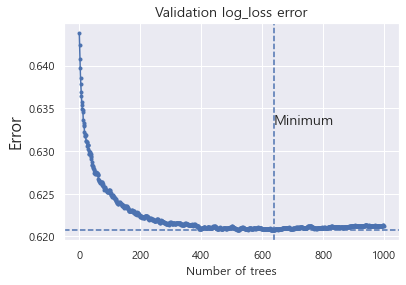

In [60]:
plt.plot(errors, "b.-")
plt.axhline(y= np.min(errors), linestyle='--')
plt.axvline(x= np.argmin(errors), linestyle='--')
plt.text(np.argmin(errors), np.min(errors)*1.02, "Minimum", fontsize=14)
plt.xlabel("Number of trees"); plt.ylabel("Error", fontsize=16)
plt.title("Validation log_loss error", fontsize=14)

In [61]:
gbrt = GradientBoostingClassifier(max_depth=1, n_estimators=1000, 
                                  learning_rate=0.5, random_state=42)
gbrt.fit(X_train, y_train)
errors = [log_loss(y_test, y_proba)
          for y_proba in gbrt.staged_predict_proba(X_test)]

print('최소 로그손실 값은:', np.min(errors))
print('의사결정트리 개수:',np.argmin(errors))

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=1000,
                           random_state=42)

최소 로그손실 값은: 0.6208134697667353
의사결정트리 개수: 71


Text(71, 0.63322973916207, 'Minimum')

Text(0.5, 0, 'Number of trees')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Validation log_loss error')

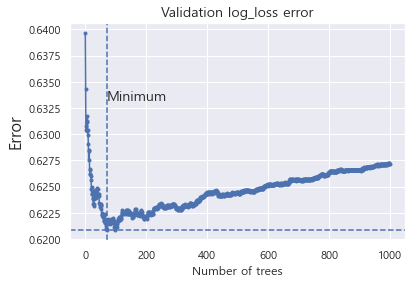

In [62]:
plt.plot(errors, "b.-")
plt.axhline(y= np.min(errors), linestyle='--')
plt.axvline(x= np.argmin(errors), linestyle='--')
plt.text(np.argmin(errors), np.min(errors)*1.02, "Minimum", fontsize=14)
plt.xlabel("Number of trees"); plt.ylabel("Error", fontsize=16)
plt.title("Validation log_loss error", fontsize=14)

In [63]:
gbrt = GradientBoostingClassifier(max_depth=1, warm_start=True, random_state=42)
min_val_error = float("inf")
error_going_up = 0
val_error_list=[]
for n_estimators in range(1, 500):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_proba = gbrt.predict_proba(X_test)
    val_error = log_loss(y_test, y_proba)
    val_error_list.append(val_error)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

GradientBoostingClassifier(max_depth=1, n_estimators=1, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=2, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=3, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=4, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=5, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=6, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=7, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=8, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=9, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=10, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=11, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=12, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=13, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=14, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=15, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=16, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=17, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=18, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=19, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=20, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=21, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=22, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=23, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=24, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=25, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=26, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=27, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=28, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=29, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=30, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=31, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=32, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=33, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=34, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=35, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=36, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=37, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=38, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=39, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=40, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=41, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=42, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=43, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=44, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=45, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=46, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=47, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=48, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=49, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=50, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=51, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=52, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=53, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=54, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=55, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=56, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=57, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=58, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=59, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=60, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=61, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=62, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=63, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=64, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=65, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=66, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=67, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=68, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=69, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=70, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=71, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=72, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=73, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=74, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=75, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=76, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=77, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=78, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=79, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=80, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=81, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=82, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=83, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=84, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=85, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=86, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=87, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=88, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=89, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=90, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=91, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=92, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=93, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=94, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=95, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=96, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=97, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=98, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, n_estimators=99, random_state=42,
                           warm_start=True)

GradientBoostingClassifier(max_depth=1, random_state=42, warm_start=True)

In [64]:
print(gbrt.n_estimators)
print("Minimum log_loss:", min_val_error)

100
Minimum log_loss: 0.6251581855170173


In [65]:
df = pd.read_pickle('../data/4장자료_01.pkl')
df.shape
df.head()

(3997, 50)

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,tv9,tv10,tv11,tv12,tv13,tv14,tv15,tv16,tv17,구매
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [66]:
df['학력'] = df['학력'].map({'정규교육없음':0,'초등학교졸업':0,
                         '중학교졸업':0,'중학교재학':0, 
                         '고등학교졸업':1,'고등학교재학':1, 
                         '전문대학졸업':2,'전문대학재학':2,
                         '대학교졸업':2,'대학교재학':2, 
                         '대학원졸업':3,'대학원재학':3})

In [67]:
X = df.drop(['구매'], axis=1)
y = df['구매']

In [68]:
cat_attribs = df.columns[df.dtypes == 'category']
cat_attribs 

Index(['성별', '지역', '직업', '주거형태', '결혼', '연령대'], dtype='object')

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_attribs:
    X[col]= le.fit(X[col]).transform(X[col])

In [70]:
float_list = np.where(X.dtypes == np.float)[0]
float_list
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for num in float_list : 
    X.iloc[:, num] = scaler.fit_transform(X.iloc[:, num].values.reshape(-1, 1))

array([ 1,  4,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48], dtype=int64)

In [71]:
from catboost import CatBoostClassifier
seed= 11
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                                  stratify= y, random_state=seed)

In [82]:
params = {'loss_function':'Logloss', 'eval_metric':'AUC', 
          'verbose': 200, 'random_seed': seed}
cbc_1 = CatBoostClassifier(**params)
cbc_1.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.042226
0:	test: 0.5984488	best: 0.5984488 (0)	total: 4.83ms	remaining: 4.83s
200:	test: 0.6571984	best: 0.6595207 (164)	total: 1.12s	remaining: 4.45s
400:	test: 0.6664806	best: 0.6686995 (386)	total: 2.31s	remaining: 3.44s
600:	test: 0.6775338	best: 0.6778577 (595)	total: 3.02s	remaining: 2.01s
800:	test: 0.6786295	best: 0.6794151 (756)	total: 3.79s	remaining: 943ms
999:	test: 0.6797321	best: 0.6816271 (967)	total: 4.73s	remaining: 0us

bestTest = 0.6816271121
bestIteration = 967

Shrink model to first 968 iterations.


In [73]:
cat_features = np.where(X.dtypes != np.float)[0]
params = {'loss_function':'Logloss', 'eval_metric':'AUC', 'verbose': 200,
          'cat_features': cat_features, 'random_seed': seed}
cbc_2 = CatBoostClassifier(**params)
cbc_2.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.042226
0:	test: 0.6023802	best: 0.6023802 (0)	total: 19.6ms	remaining: 19.5s
200:	test: 0.6647372	best: 0.6650542 (198)	total: 3.51s	remaining: 14s
400:	test: 0.6755768	best: 0.6765967 (380)	total: 7.26s	remaining: 10.8s
600:	test: 0.6794978	best: 0.6798768 (593)	total: 10.6s	remaining: 7.04s
800:	test: 0.6793737	best: 0.6804074 (644)	total: 13.9s	remaining: 3.44s
999:	test: 0.6795322	best: 0.6806279 (818)	total: 17.1s	remaining: 0us

bestTest = 0.6806279115
bestIteration = 818

Shrink model to first 819 iterations.


In [74]:
from catboost import Pool
train_data = Pool(data=X_train, label=y_train, cat_features=cat_features)
valid_data = Pool(data=X_test, label=y_test, cat_features=cat_features)
params = {'loss_function':'Logloss', 'eval_metric':'AUC',
          'early_stopping_rounds': 200, 'verbose': 200,
          'random_seed': seed}
cbc_3 = CatBoostClassifier(**params)
cbc_3.fit(train_data, eval_set=valid_data)

Learning rate set to 0.042226
0:	test: 0.6023802	best: 0.6023802 (0)	total: 24.1ms	remaining: 24s
200:	test: 0.6647372	best: 0.6650542 (198)	total: 2.88s	remaining: 11.5s
400:	test: 0.6755768	best: 0.6765967 (380)	total: 6.57s	remaining: 9.81s
600:	test: 0.6794978	best: 0.6798768 (593)	total: 9.56s	remaining: 6.34s
800:	test: 0.6793737	best: 0.6804074 (644)	total: 12.6s	remaining: 3.13s
999:	test: 0.6795322	best: 0.6806279 (818)	total: 15.7s	remaining: 0us

bestTest = 0.6806279115
bestIteration = 818

Shrink model to first 819 iterations.


In [75]:
from catboost import cv
params = {'loss_function':'Logloss', 'eval_metric':'AUC',
          'verbose': 200, 'early_stopping_rounds': 100,
          'random_seed': seed}
all_train_data = Pool(data=X, label=y, cat_features=cat_features)
scores = cv(pool=all_train_data, params=params, fold_count=4, seed=seed, 
            shuffle=True,  stratified=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6080165	best: 0.6080165 (0)	total: 133ms	remaining: 2m 13s
200:	test: 0.7003324	best: 0.7005179 (197)	total: 21.3s	remaining: 1m 24s
400:	test: 0.7037049	best: 0.7039456 (383)	total: 43.3s	remaining: 1m 4s
600:	test: 0.7058123	best: 0.7058218 (583)	total: 1m 6s	remaining: 43.9s
Stopped by overfitting detector  (100 iterations wait)


<Figure size 2160x360 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

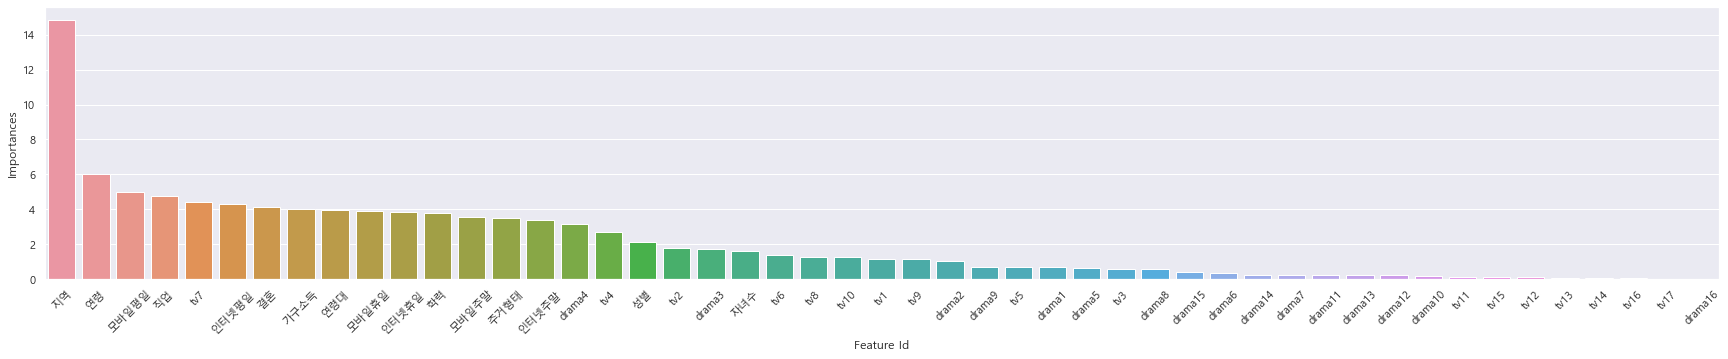

In [76]:
feature = cbc_3.get_feature_importance(prettified=True)
plt.figure(figsize=(30,5))
sns.barplot(x='Feature Id', y='Importances', data=feature)
plt.xticks(rotation=45)

In [77]:
import shap   
explainer = shap.TreeExplainer(cbc_3) 
shap_values = explainer.shap_values(train_data)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_train.iloc[:100,:])

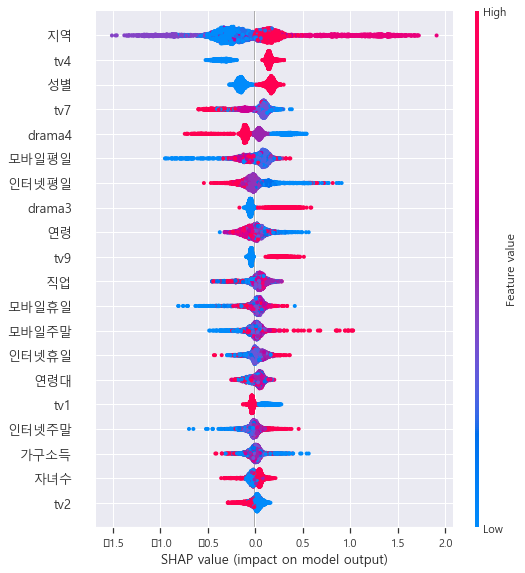

In [78]:
shap.summary_plot(shap_values, X_train)

In [79]:
y_predict = cbc_3.predict(X_test)
y_proba = cbc_3.predict_proba(X_test)
accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

0.705

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       522
           1       0.65      0.33      0.44       278

    accuracy                           0.70       800
   macro avg       0.68      0.62      0.62       800
weighted avg       0.69      0.70      0.67       800



In [80]:
log_loss(y_test, y_proba)
brier_score_loss(y_test, y_proba[:,1])
matthews_corrcoef(y_test, y_predict)

0.6030054300355225

0.20448760213927886

0.29353740089707697

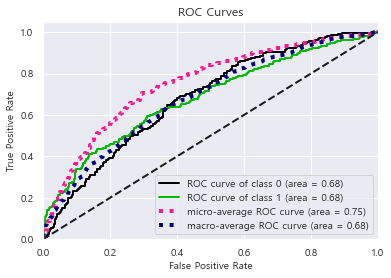

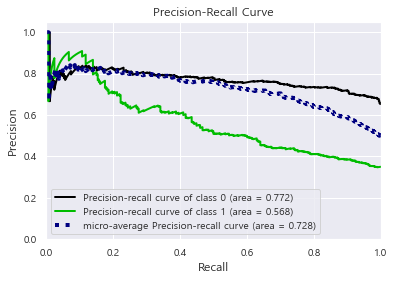

In [81]:
skplt.metrics.plot_roc(y_test, y_proba)
skplt.metrics.plot_precision_recall(y_test, y_proba)